In [1]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shefali\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv("../outputs/combined_clean_preprocessed.csv")
df.head()


,text,label,source,clean_text
0,The largest low-wage employer is not McDonalds...,0,LIAR,largest lowwage employer mcdonalds walmart us ...
1,A majority in every state favors path to citiz...,1,LIAR,majority every state favors path citizenship u...
2,Says some [states] with the largest reductions...,1,LIAR,says states largest reductions crime also lowe...
3,Chris Koster opposed protecting the women of M...,1,LIAR,chris koster opposed protecting women missouri...
4,So I told the person that I don’t like that I ...,1,MU3D,told person dont like like guy um like footbal...


In [3]:
# Apply VADER sentiment analysis
df[['neg', 'neu', 'pos', 'compound']] = df['clean_text'].apply(lambda x: pd.Series(sia.polarity_scores(x)))

# Preview
df[['clean_text', 'neg', 'neu', 'pos', 'compound']].head()


,clean_text,neg,neu,pos,compound
0,largest lowwage employer mcdonalds walmart us ...,0.000,1.000,0.000,0.0000
1,majority every state favors path citizenship u...,0.000,0.778,0.222,0.2500
2,says states largest reductions crime also lowe...,0.580,0.420,0.000,-0.8074
3,chris koster opposed protecting women missouri...,0.466,0.534,0.000,-0.9201
4,told person dont like like guy um like footbal...,0.275,0.359,0.366,0.9270


In [4]:
df.to_csv("../outputs/combined_features.csv", index=False)
print("✅ Features added and saved to combined_features.csv")


✅ Features added and saved to combined_features.csv


In [5]:
import pandas as pd

# Load the emotion lexicon
nrc = pd.read_csv("C:/Users/Shefali/OneDrive/Desktop/Criminal-Deception-Project/data/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", 
                  names=["word", "emotion", "association"], 
                  sep="\t")

# Filter to only associated words (1s)
nrc = nrc[nrc["association"] == 1]
nrc.head()


,word,emotion,association
19,abacus,trust,1
23,abandon,fear,1
25,abandon,negative,1
27,abandon,sadness,1
30,abandoned,anger,1


In [6]:
from collections import defaultdict

# Create word → [emotions] mapping
emotion_dict = defaultdict(list)
for row in nrc.itertuples():
    emotion_dict[row.word].append(row.emotion)


In [7]:
from nltk.tokenize import word_tokenize

def get_emotions(text):
    words = word_tokenize(text)
    emotion_counter = defaultdict(int)
    for word in words:
        for emotion in emotion_dict.get(word, []):
            emotion_counter[emotion] += 1
    return pd.Series(emotion_counter)


In [8]:
# Load your existing features
df = pd.read_csv("../outputs/combined_features.csv")

# Apply emotion extraction
emotion_features = df['clean_text'].apply(get_emotions).fillna(0)

# Join back to the main dataframe
df = pd.concat([df, emotion_features], axis=1)

# Preview
df.head()


,text,label,source,clean_text,neg,neu,pos,compound,fear,negative,joy,positive,trust,anger,sadness,anticipation,surprise,disgust
0,The largest low-wage employer is not McDonalds...,0,LIAR,largest lowwage employer mcdonalds walmart us ...,0.000,1.000,0.000,0.0000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A majority in every state favors path to citiz...,1,LIAR,majority every state favors path citizenship u...,0.000,0.778,0.222,0.2500,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Says some [states] with the largest reductions...,1,LIAR,says states largest reductions crime also lowe...,0.580,0.420,0.000,-0.8074,1.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
3,Chris Koster opposed protecting the women of M...,1,LIAR,chris koster opposed protecting women missouri...,0.466,0.534,0.000,-0.9201,3.0,4.0,2.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0
4,So I told the person that I don’t like that I ...,1,MU3D,told person dont like like guy um like footbal...,0.275,0.359,0.366,0.9270,1.0,1.0,8.0,10.0,7.0,1.0,1.0,4.0,1.0,1.0


In [9]:
df.to_csv("../outputs/combined_features_with_emotions.csv", index=False)
print("✅ Emotion features added and saved.")


✅ Emotion features added and saved.


In [10]:
import pandas as pd

df = pd.read_csv("../outputs/combined_features_with_emotions.csv")
df.head()


,text,label,source,clean_text,neg,neu,pos,compound,fear,negative,joy,positive,trust,anger,sadness,anticipation,surprise,disgust
0,The largest low-wage employer is not McDonalds...,0,LIAR,largest lowwage employer mcdonalds walmart us ...,0.000,1.000,0.000,0.0000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A majority in every state favors path to citiz...,1,LIAR,majority every state favors path citizenship u...,0.000,0.778,0.222,0.2500,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Says some [states] with the largest reductions...,1,LIAR,says states largest reductions crime also lowe...,0.580,0.420,0.000,-0.8074,1.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
3,Chris Koster opposed protecting the women of M...,1,LIAR,chris koster opposed protecting women missouri...,0.466,0.534,0.000,-0.9201,3.0,4.0,2.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0
4,So I told the person that I don’t like that I ...,1,MU3D,told person dont like like guy um like footbal...,0.275,0.359,0.366,0.9270,1.0,1.0,8.0,10.0,7.0,1.0,1.0,4.0,1.0,1.0


In [11]:
import textstat


In [12]:
from nltk.tokenize import word_tokenize

# Word count
df["word_count"] = df["clean_text"].apply(lambda x: len(word_tokenize(x)))

# Character count (no spaces)
df["char_count"] = df["clean_text"].apply(lambda x: len(x.replace(" ", "")))

# Avg word length
df["avg_word_length"] = df["char_count"] / df["word_count"]

# Type-Token Ratio (TTR) = unique words / total words
df["ttr"] = df["clean_text"].apply(lambda x: len(set(word_tokenize(x))) / len(word_tokenize(x)) if len(word_tokenize(x)) > 0 else 0)


In [13]:
# Reading ease score (higher = easier)
df["flesch_reading_ease"] = df["clean_text"].apply(textstat.flesch_reading_ease)

# Grade level (U.S. school grade level)
df["flesch_kincaid_grade"] = df["clean_text"].apply(textstat.flesch_kincaid_grade)


In [14]:
df[["clean_text", "word_count", "avg_word_length", "ttr", "flesch_reading_ease", "flesch_kincaid_grade"]].head()
df[["clean_text", "word_count", "avg_word_length", "ttr", "flesch_reading_ease", "flesch_kincaid_grade"]].head()


,clean_text,word_count,avg_word_length,ttr,flesch_reading_ease,flesch_kincaid_grade
0,largest lowwage employer mcdonalds walmart us ...,7,7.142857,1.000000,22.07,11.9
1,majority every state favors path citizenship u...,8,7.625000,1.000000,-46.63,21.7
2,says states largest reductions crime also lowe...,9,6.555556,1.000000,28.50,11.5
3,chris koster opposed protecting women missouri...,19,5.578947,0.947368,43.73,11.9
4,told person dont like like guy um like footbal...,64,5.078125,0.671875,23.44,25.9


In [15]:
df.to_csv("../outputs/final_dataset_with_features.csv", index=False)
print("✅ All features extracted and saved to final_dataset_with_features.csv")


✅ All features extracted and saved to final_dataset_with_features.csv


In [16]:
import pandas as pd
df = pd.read_csv("../outputs/final_dataset_with_features.csv")
df.head()


,text,label,source,clean_text,neg,neu,pos,compound,fear,negative,...,sadness,anticipation,surprise,disgust,word_count,char_count,avg_word_length,ttr,flesch_reading_ease,flesch_kincaid_grade
0,The largest low-wage employer is not McDonalds...,0,LIAR,largest lowwage employer mcdonalds walmart us ...,0.000,1.000,0.000,0.0000,1.0,1.0,...,0.0,0.0,0.0,0.0,7,50,7.142857,1.000000,22.07,11.9
1,A majority in every state favors path to citiz...,1,LIAR,majority every state favors path citizenship u...,0.000,0.778,0.222,0.2500,0.0,0.0,...,0.0,0.0,0.0,0.0,8,61,7.625000,1.000000,-46.63,21.7
2,Says some [states] with the largest reductions...,1,LIAR,says states largest reductions crime also lowe...,0.580,0.420,0.000,-0.8074,1.0,2.0,...,1.0,0.0,0.0,0.0,9,59,6.555556,1.000000,28.50,11.5
3,Chris Koster opposed protecting the women of M...,1,LIAR,chris koster opposed protecting women missouri...,0.466,0.534,0.000,-0.9201,3.0,4.0,...,3.0,2.0,1.0,2.0,19,106,5.578947,0.947368,43.73,11.9
4,So I told the person that I don’t like that I ...,1,MU3D,told person dont like like guy um like footbal...,0.275,0.359,0.366,0.9270,1.0,1.0,...,1.0,4.0,1.0,1.0,64,325,5.078125,0.671875,23.44,25.9


In [17]:
X = df.drop(columns=["text", "clean_text", "label", "source"])
y = df["label"]


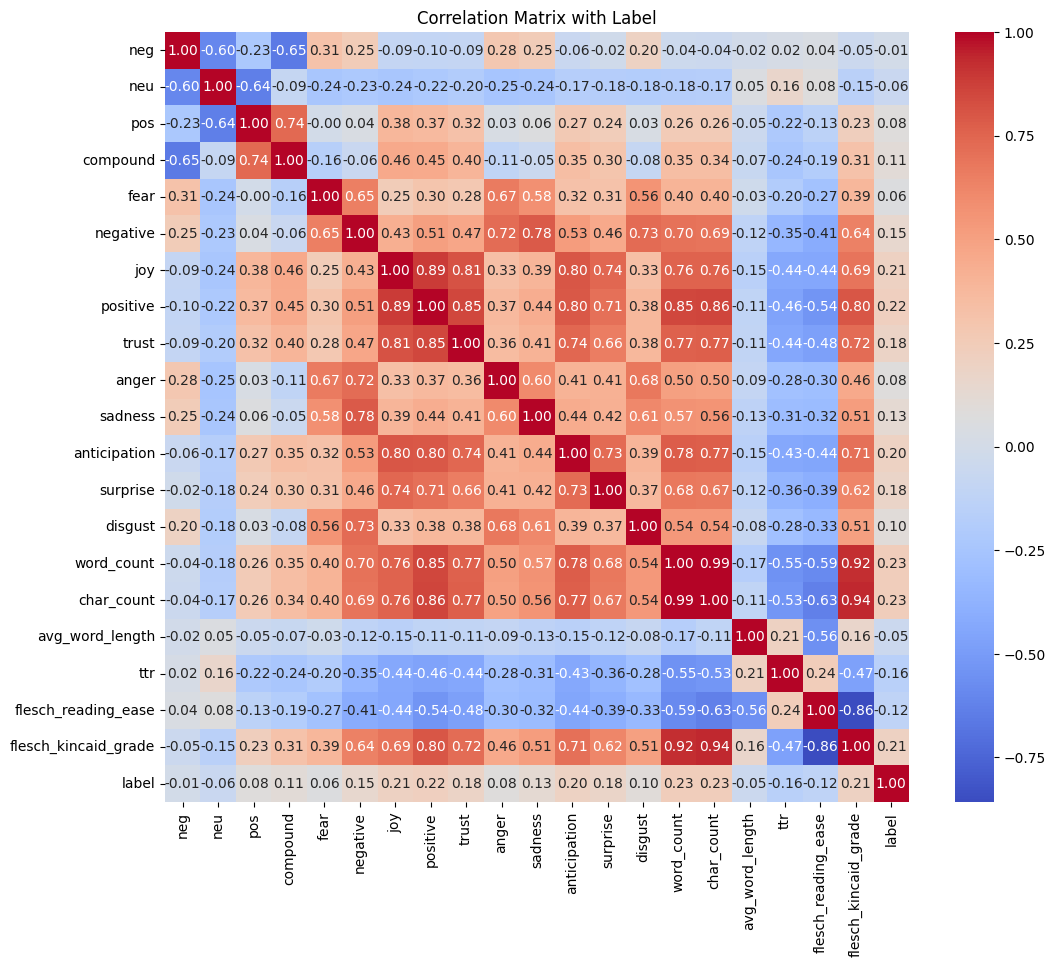

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
corr = df[X.columns.tolist() + ["label"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with Label")
plt.show()


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the 'clean_text' column (bag-of-words model)
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_text = vectorizer.fit_transform(df['clean_text'])

# Convert to DataFrame for easier handling
X_text_df = pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out())


In [20]:
from sklearn.feature_selection import SelectKBest, chi2

# Target variable (binary: truthful vs. deceptive)
y = df['label']

# Apply SelectKBest with chi-square score function
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_text_df, y)

# Get the chi-square scores
chi2_scores = pd.DataFrame({
    'Feature': X_text_df.columns,
    'Chi2 Score': chi2_selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

# Display the top 10 features with the highest chi-square scores
print(chi2_scores.head(10))


     Feature   Chi2 Score
391    hotel  2025.345987
733     room  1671.429257
127  chicago   922.016090
821     stay   787.779681
812    staff   490.246386
768  service   459.582229
348    great   444.969593
734    rooms   423.701558
822   stayed   404.902467
570    night   317.371259


In [21]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming 'df' is your dataframe
X = df.drop(columns=["label", "source", "text", "clean_text"])  # Drop non-feature columns
y = df['label']

# Create the model
model = RandomForestClassifier()

# RFE: Select the top 10 features
selector = RFE(estimator=model, n_features_to_select=10)
selector = selector.fit(X, y)

# Get the ranking of features (lower number means more important)
ranking = selector.ranking_

# Display the features and their rankings
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': ranking
}).sort_values(by='Ranking')

print(feature_ranking.head(10))


                 Feature  Ranking
0                    neg        1
1                    neu        1
2                    pos        1
3               compound        1
7               positive        1
14            word_count        1
15            char_count        1
16       avg_word_length        1
18   flesch_reading_ease        1
19  flesch_kincaid_grade        1


In [22]:
from sklearn.linear_model import LassoCV

# Apply Lasso Regression for feature selection
lasso = LassoCV(cv=5)
lasso.fit(X, y)

# Get the coefficients and select non-zero coefficients
lasso_features = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

# Filter out features with zero coefficients
selected_features = lasso_features[lasso_features['Coefficient'] != 0]
print(selected_features.head(10))



                Feature  Coefficient
6                   joy     0.004638
7              positive     0.000984
14           word_count    -0.001058
15           char_count     0.000925
18  flesch_reading_ease     0.000546


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance.head(10))


                 Feature  Importance
15            char_count    0.123854
16       avg_word_length    0.121808
18   flesch_reading_ease    0.091314
19  flesch_kincaid_grade    0.089150
3               compound    0.071894
1                    neu    0.069130
14            word_count    0.068737
2                    pos    0.049876
7               positive    0.046589
0                    neg    0.045287
